In [113]:
import os
print "hey"
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

hey


In [114]:
directory = "../data/"
files = os.listdir(directory)
print files

OSError: [Errno 2] No such file or directory: '../data/'

In [86]:
# fname = files[0]

# fp = open(directory + fname, "r+")
# utime = []
# stime = []
# major_pf = []
# minor_pf = []

# for line in fp:
#     datas = line.strip().split(" ")
#     # datas = line
#     if len(datas) != 4 or datas[0] == 'read':
#         print datas
#         continue # continue
#     major_pf.append(int(datas[0]))
#     minor_pf.append(int(datas[1]))
#     utime.append(int(datas[2]))
#     stime.append(int(datas[3]))

# x_label = [0.05 * i for i in range(len(utime))]
# #print utime


In [98]:
# def save_helper(case, arg, tar_dir):
#     tar_dir = './'
#     sv_fname = 'case' + str(case) + ‘_’
#     if (case == 2)
    
#     savefig(fname, dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)


In [108]:
# plot x-axis = N, y axis = metrics
def paint(fn, plot_datas, mode):
    
    # print plot_datas[0]
    
    if mode == 1: # plot N - final result
        #do
        # print "shape of array", plot_datas[plot_datas.keys[0]].shape()
        
        
        x_label = plot_datas.keys() #N
        print "this is tested N: " + str(x_label)
        range_limit = 9999999999
        for i in x_label:
            range_limit = min(range_limit, len(plot_datas[i][0]))
        print "range limit %d" % range_limit
        plot_data = []
        
        data_index = range_limit - 1
        for typeindex in range(5):
            plot_data.append([plot_datas[i][typeindex][data_index] for i in x_label ])
        print plot_data
        title1 = 'N_page_fault'
        title2 = "N_cpu_time"
        title3 = "N_cpu_time_utilization"
        
        plt.title(title1)
        plt.plot( x_label, plot_data[0], "r+", x_label, plot_data[1], "ro")  # pg_flt - N 
        plt.xlabel("N")
        plt.ylabel("cumulative page fault(times)")
        fig1=plt.gcf()
        fig1.savefig(title1 + '.png',  bbox_inches='tight')
#         plt.show()
        plt.close()
        
        plt.title(title2)
        plt.plot( x_label, plot_data[2], 'g+', x_label, plot_data[3], 'go') # utime and stime
        plt.xlabel("N")
        plt.ylabel("cpu time(jiffiies)")
        fig2=plt.gcf()
        fig2.savefig(title2 + '.png',  bbox_inches='tight')
        plt.show()
        plt.close()
        
        plt.title(title3)
        plt.plot( x_label, plot_data[4], 'b+')
        plt.xlabel("N")
        plt.ylabel("utilization(utime/stime)")
        fig3=plt.gcf()
        fig3.savefig(title3 + '.png', bbox_inches='tight')
        plt.show()
        plt.close()
        
#         print fig1, fig2, fig3
        
    else:
        title1 = fn + "- time - page fault"
#         title2 = fn + "- time - cpu time"
        rang = len(plot_datas[0])
        print rang
        x_label = [0.05 * i for i in range(rang)]
        
        plt.title(title1)
        plt.plot( x_label, plot_datas[0], "r+", x_label, plot_datas[1], "ro")  # pg_flt
        plt.xlabel("time(s)")
        plt.ylabel("data-page fault")
        fig=plt.gcf()
        plt.show()
        fig.savefig('case12_' + fn + '.png', bbox_inches='tight')
        plt.close()
        
#         plt.title(title2)
#         plt.plot( x_label, plot_datas[2], 'g+', x_label, plot_datas[3], 'go')
#         plt.xlabel("times(s)")
#         plt.ylabel("cpu time")
#         plt.show()
        

exp12:   2
1005
10015
1008
exp12:   1
1006
1007
1005
1348
1006
{1: 'profile1.data', 2: 'profile2.data'} fn_exp12
1026


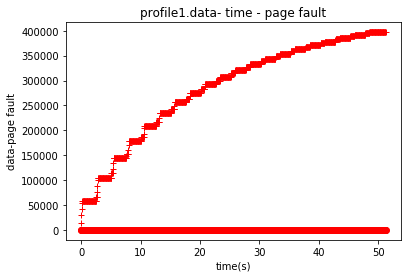

1027


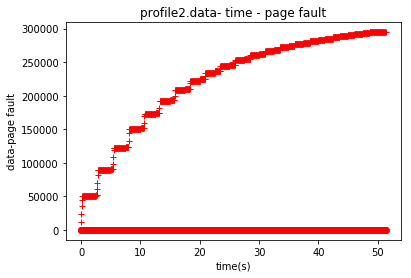

this is tested N: [1, 3, 5, 7, 9, 11, 50, 20]
range limit 1005
[[52790, 150834, 251401, 351972, 454603, 555476, 1500850, 993396], [2, 0, 0, 0, 0, 0, 11883, 51275], [6, 20, 20, 56, 69, 70, 93, 126], [23, 68, 120, 146, 160, 229, 4160, 864], [0.2608695652173913, 0.29411764705882354, 0.16666666666666666, 0.3835616438356164, 0.43125, 0.3056768558951965, 0.02235576923076923, 0.14583333333333334]]


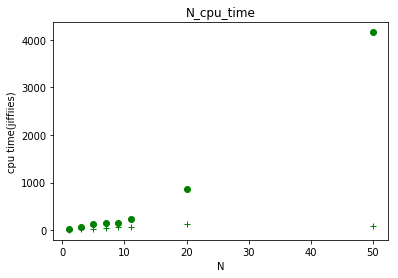

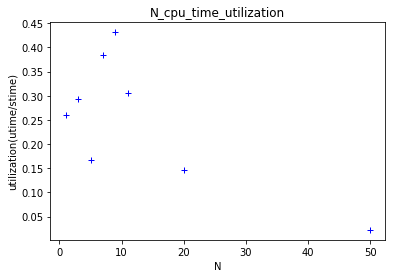

finished


In [109]:
# for N iterations: 

def readData(data, directory, fn):
    fp = open(directory + fn, "r+")
    data.append([]) # minor fault
    data.append([]) # major fault
    data.append([]) # utime
    data.append([]) # stime
    data.append([]) # efficiency
    # print data
    for line in fp:
        data_line = line.strip().split(" ")
        # datas = line
        if len(data_line) != 4 or data_line[0] == 'read' or data_line[0] == 'file':
            # print data_line
            continue # continue
        data[0].append(int(data_line[0]))
        data[1].append(int(data_line[1]))
        data[2].append(int(data_line[2]))
        data[3].append(int(data_line[3]))
        data[4].append(float (data[2][-1]) / data[3][-1])
    
    # print "data read finished for file %s, %d lines of data read in " % (fn, len(data[4]))
    fp.close()


fnames = []
datas_exp3 = {} # N related
fn_exp3 = {}
datas_exp12 = {} # experiments
fn_exp12 = {}

for f in files:
    index = f.find("N")
    if index != -1:
        s = f[index:]
        s = s.split(".")[0][1:]
        # print "N = " + s # N
        N = int(s)
        data = []
        datas_exp3[N] = data
        fn_exp3[N] = f
        readData(data, directory, f)
        print len(datas_exp3[N][0]) # test
    else:  # experiment 1 & 2
        N = int(f.split(".")[0][-1])
        print 'exp12:  ', N
        data = []
        datas_exp12[N] = data
        fn_exp12[N] = f
        readData(data, directory, f)
    
def paint_tool(exp, idx, mode):
    if exp == 3:
        if mode == 1: # print N relation
            paint(fn_exp3, datas_exp3, mode)
        else:
            paint(fn_exp3[idx], datas_exp3[idx], mode)
    else: # exp == 1
        paint(fn_exp12[idx], datas_exp12[idx], 0)

# experiment 3, N = 5
# paint_tool(3, 5, 0)

# experiment 1,2 
print fn_exp12, 'fn_exp12'
paint_tool(1, 1, 0)
paint_tool(1, 2, 0) # run the second experiment

# experiment 3, N = 3 5 111，
paint_tool(3, 0, 1)

print "finished" 

0.5
